In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten, Activation, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
from keras_visualizer import visualizer

Problema
El problema a resolver es diseñar una red convolucional para que puede reconocer los pokemon de la clase 1, los cuales son 150. Dataset: https://www.kaggle.com/datasets/lantian773030/pokemonclassification. 

Vamos a crear la red convolucional, con dos layers convolucionales 2d, que despues de cada una se le aplica un batch normalization, pasa por una funcion de activacion de "relu", que es eficaz al detectar rasgos y despues se le hace dropout al input para simplificar la salida, despues se le hace flatten para que se conecta la ultima capa de dense que es de 150, el numero de clases, y usa una funcion de activacion softmax, muy util en la clasificacion categorica.

In [4]:
model = Sequential()
model.add(Conv2D(64, input_shape=(224, 224, 3), kernel_size= 4, padding= "same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size= 4))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(150, activation="softmax"))


Compilamos el modelo con metricas de precision, optimizador adam para que se adapte por cada epoch, y usamos una funcion de perdida llamada categorical cross entropy. Al final visualizamos el modelo para ver cada capa y los parametros que tiene cada una.

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      3136      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      32800     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 32)      

Aca de la carpeta se van a extraer las imagenes, se van a reescalar a 224x224 y segun la configuracion del generador de informacion de imagenes, se van a reescalar, dar vuelta horizontalmente y verticalmente. El proposito de estom es evitar el overfitting en el modelo, que es cuando el modelo mejora su precision y loss en training, pero en validation empieza a empeorar por cada epoch. Estas imagenes modificadas nos van a permitir entrenar al modelo en base a rasgos mas generales. Tambien se visualizan 5 imagenes de abajo no modificadas.

In [3]:
generator = ImageDataGenerator(validation_split= 0.2, rescale=1./255, horizontal_flip= True, vertical_flip= True)

Found 5511 images belonging to 150 classes.
Found 1309 images belonging to 150 classes.


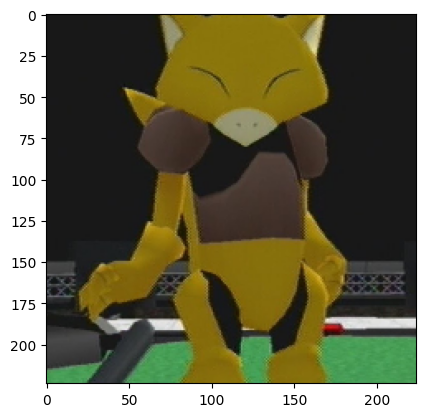

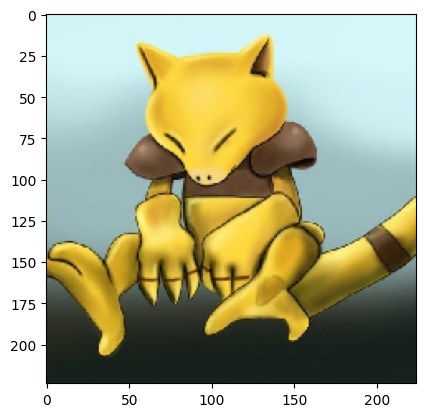

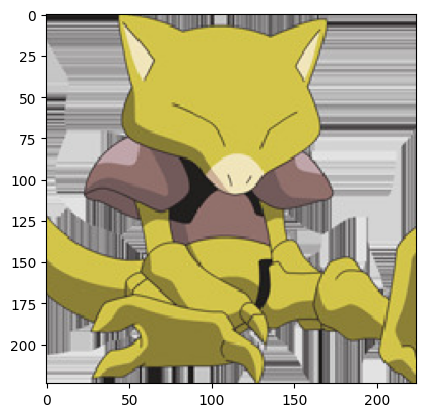

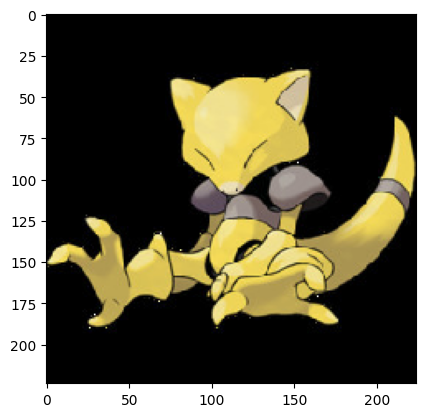

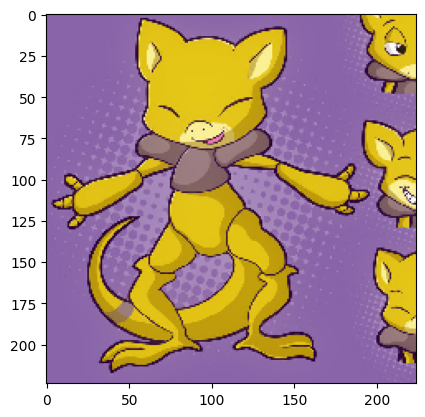

In [37]:
traindata = generator.flow_from_directory(directory= r"C:\Users\gonza\Downloads\PokemonData", target_size=(224,224), subset = "training",  batch_size=32)
testdata = generator.flow_from_directory(directory=r"C:\Users\gonza\Downloads\PokemonData", target_size=(224,224), subset = "validation",  batch_size=32)

for i in range(5):
    img = image.load_img(traindata.filepaths[i], target_size= (224,224))
    plt.imshow(img)
    plt.show()
    if i > 5:
        break  # otherwise the generator would loop indefinitely



Ahora con las imagenes ya listas, vamos a fittearlas al modelo, en el cual insertamos las imagenes training y las test de validacion, ademas que por cada epoch se guardan las weights. Con esto veremos la precision y perdida del modelo por cada epoch. Este modelo tarda 30 epochs en llegar a una precision aceptable.

In [31]:
model.fit(
        traindata,
        epochs= 30,
        validation_data= testdata
        )
model.save_weights('first_try.h5')

Epoch 1/5
173/173 [==============================] - 141s 816ms/step - loss: 0.2789 - accuracy: 0.9234 - val_loss: 5.2219 - val_accuracy: 0.3117
Epoch 2/5
173/173 [==============================] - 140s 807ms/step - loss: 0.2495 - accuracy: 0.9356 - val_loss: 3.8156 - val_accuracy: 0.3881
Epoch 3/5
173/173 [==============================] - 140s 808ms/step - loss: 0.2456 - accuracy: 0.9292 - val_loss: 4.4565 - val_accuracy: 0.3812
Epoch 4/5
173/173 [==============================] - 140s 809ms/step - loss: 0.2130 - accuracy: 0.9452 - val_loss: 3.5241 - val_accuracy: 0.4148
Epoch 5/5
173/173 [==============================] - 140s 808ms/step - loss: 0.1807 - accuracy: 0.9545 - val_loss: 3.7647 - val_accuracy: 0.4156



Epoch 30/30
173/173 [==============================] - 140s 808ms/step - loss: 0.1807 - accuracy: 0.9545 - val_loss: 3.7647 - val_accuracy: 0.4156